# EarlyDarkEmu

> GP emulator for power spectra in Early Dark Energy model

emulator for P(k) for dark matter power spectra

## Install

(not installable yet)
```sh
pip install EarlyDarkEmu
```

(Use this development version instead)

```sh
git clone https://github.com/nesar/EarlyDarkEmu.git
cd EarlyDarkEmu/
pip install -e '.[dev]'
```

## Basic rundown

### A few imports 

In [ ]:
from EarlyDarkEmu.load import *
from EarlyDarkEmu.viz import *
from EarlyDarkEmu.pca import *
from EarlyDarkEmu.gp import *
from EarlyDarkEmu.emu import *
from EarlyDarkEmu.mcmc import *

import pandas as pd
import numpy as np
import matplotlib.pylab as plt


if_train_all = False ## Re-train all the models. Time-consuming. 
if_mcmc_all = False  ## Full MCMC run. Time-consuming. 
if_savefig = False 

if_pk_log = True ## P(k) is to be in log10 scaling 
if_y_scale_plot_log = not if_pk_log
if_separate_test_set = True


(210,)


### Loading files

In [ ]:
p_all = load_params() ## Loading Cosmological Parameters
Pk_all, k_all, z_all = load_npy_pk_k_z(pk_log_scale=if_pk_log) # Loading P(k), k and redshift

print(p_all.shape, Pk_all.shape, k_all.shape, z_all.shape, PARAM_NAME)
print(len(PARAM_NAME))

remove_invalid_index = False
if remove_invalid_index == True:
    remove_sim_indx = [None]
    valid_indices = [i for i in  np.arange(Pk_all.shape[0])  if i not in remove_sim_indx]

    Pk_all = Pk_all[valid_indices]
    p_all = p_all[valid_indices]

(64, 6) (64, 51, 210) (210,) (51,) ['$\\omega_m$', 'h', '$\\sigma_8$', '$\\log(z_c)$', '$f_{ede}$', '$\\theta_i$']
6


### A few plotting routines

#### Experimental design

#### Boost metrics colored by cosmology parameters

<ErrorbarContainer object of 3 artists>

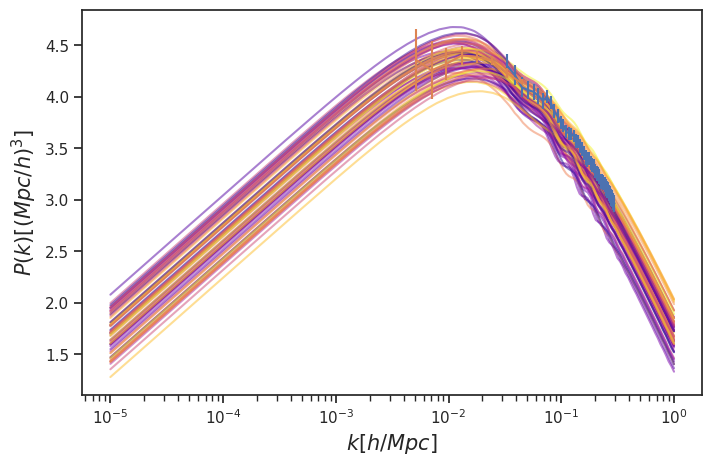

In [ ]:
color_by_index = 0
z_index = 0

plot_lines_with_param_color(p_all[:, color_by_index], 
                            k_all, 
                            Pk_all[:, z_index, :], 
                            'Training data, z=' + str(z_all[z_index]), 
                            r'$k [h/Mpc]$', 
                            r'$P(k) [(Mpc/h)^3]$', 
                            PARAM_NAME[color_by_index],
                            y_log_plot_scale=if_y_scale_plot_log);

k_sdss, pk_sdss, pk_error_sdss = load_sdss()
k_wmap, pk_wmap, pk_error_wmap = load_wmap()

plt.errorbar(k_sdss, pk_sdss, yerr=pk_error_sdss, label='SDSS DR7')
plt.errorbar(k_wmap, pk_wmap, yerr=pk_error_wmap, label='WMAP + ACT')

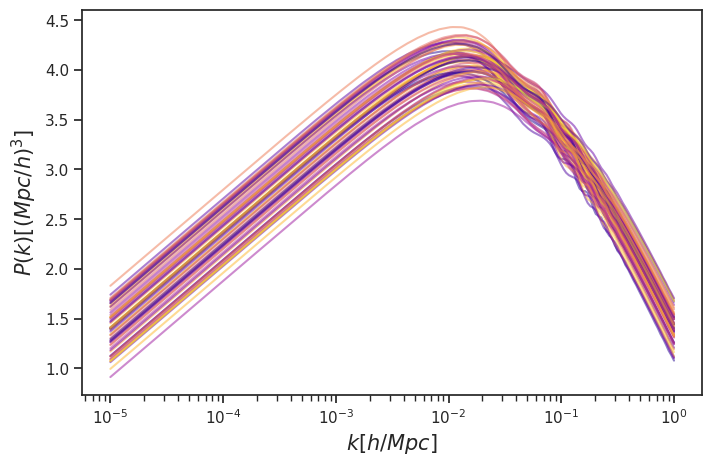

In [ ]:
#| hide 

color_by_index = 3
z_index = 21


plot_lines_with_param_color(p_all[:, color_by_index], 
                            k_all, 
                            Pk_all[:, z_index, :], 
                            'Training data, z=' + str(z_all[z_index]), 
                            r'$k [h/Mpc]$', 
                            r'$P(k) [(Mpc/h)^3]$', 
                            PARAM_NAME[color_by_index],
                            y_log_plot_scale=if_y_scale_plot_log);


# plt.legend()

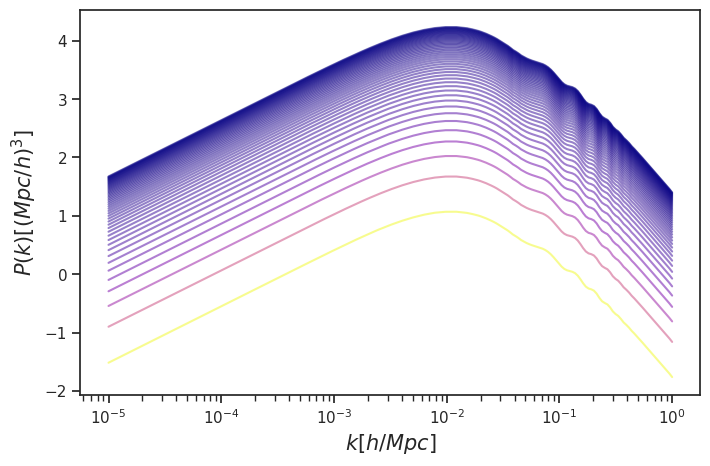

In [ ]:
#| hide 

z_index = 0

f = plot_lines_with_param_color(z_all, 
                            k_all, 
                            Pk_all[16, :, :], 
                            'Training data', 
                            r'$k [h/Mpc]$', 
                            r'$P(k) [(Mpc/h)^3]$', 
                            'redshift',
                            y_log_plot_scale=if_y_scale_plot_log);


### Training involves: PCA, GP fitting.  

In [ ]:
if not if_separate_test_set: 
    ## Data prep
    z_index = 1
    y_vals = Pk_all[:, z_index, :]
    # y_ind = np.arange(0, y_vals.shape[1])
    y_ind = k_all

    # Train-test split
    test_indices = [60, 30, 26]
    input_params= p_all[test_indices]
    target_vals = Pk_all[:, z_index, :][test_indices]


    train_indices = [i for i in  np.arange(Pk_all.shape[0]) if i not in test_indices]
    p_all_train = p_all[train_indices]
    y_vals_train = Pk_all[:, z_index, :][train_indices]
    print('Redshift: ' + str(z_all[z_index]))

In [ ]:


if if_separate_test_set:

    p_all_test = load_params(p_fileIn=LIBRARY_PARAM_FILE_TEST) 
                              ## Loading Cosmological Parameters
    Pk_all_test, k_all_test, z_all_test = load_npy_pk_k_z(Pk_fileIn=LIBRARY_PK_FILE_TEST, 
                                                          k_fileIn=LIBRARY_K_FILE_TEST, 
                                                          z_fileIn=LIBRARY_Z_FILE_TEST,
                                                          pk_log_scale=if_pk_log) # Loading P(k), k and redshift



    ## Data prep
    z_index = 1
    y_vals = Pk_all[:, z_index, :]
    # y_ind = np.arange(0, y_vals.shape[1])
    y_ind = k_all

    # Train-test split
    test_indices = []
    input_params= p_all_test
    target_vals = Pk_all_test[:, z_index, :]


    # train_indices = [i for i in  np.arange(Pk_all.shape[0]) if i not in test_indices]
    train_indices = [i for i in  np.arange(Pk_all.shape[0])]
    p_all_train = p_all[train_indices]
    y_vals_train = Pk_all[:, z_index, :][train_indices]
    print('Redshift: ' + str(z_all[z_index]))



Redshift: 0.02


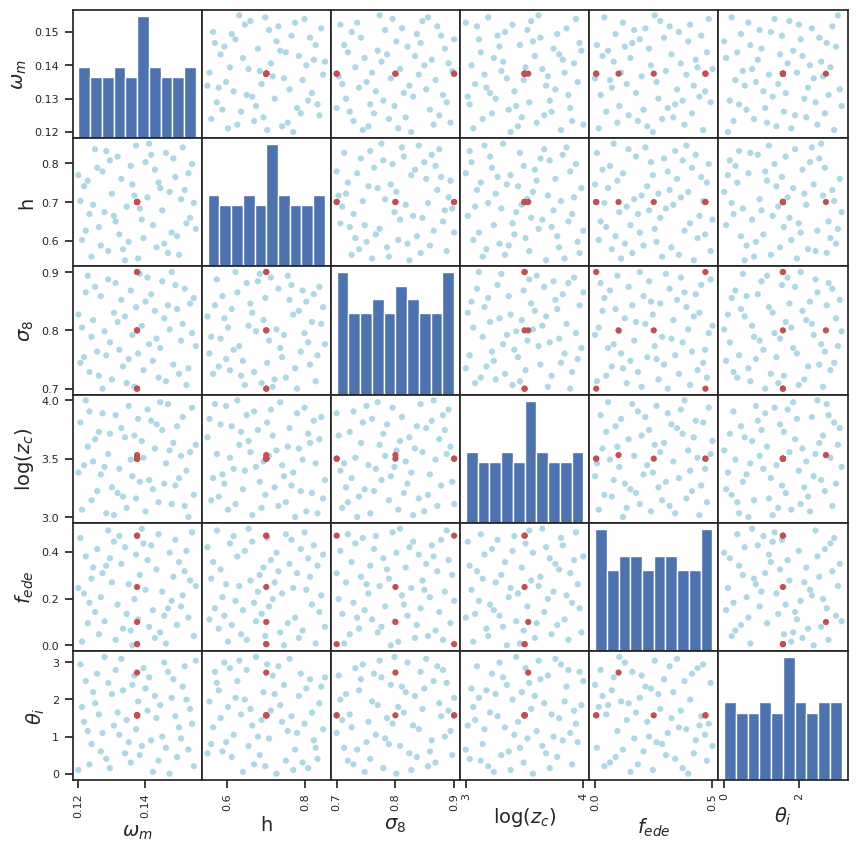

In [ ]:
df_train_a = pd.DataFrame(np.concatenate([p_all, p_all_test], axis=0), columns=PARAM_NAME)
colors = ['lightblue']*p_all.shape[0] + ['r']*p_all_test.shape[0]

# colors = ['b']*num_sims + ['r']*num_sims_test
plot_scatter_matrix(df_train_a, colors);

This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 210
m  =    64 (number of simulated data)
p  =     1 (number of inputs)
q  =     6 (number of additional simulation inputs)
pu NOT SET (transformed response dimension); call method create_K_basis 

Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:27<00:00,  1.79it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.5567071  0.27403554]
 [0.03499926 0.11760061]
 [0.23135064 0.19929031]
 [0.03078701 0.15057455]
 [0.00413163 0.09408893]
 [0.00602459 0.41019213]
 [0.00095415 0.02884246]]
lamUz
[[0.38595112 0.59847622]]
lamWs
[[8711.68689867 1162.69623062]]
lamWOs
[[25.19662833]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.29it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index1.pkl
No thetas to plot


(None, <Figure size 1000x750 with 5 Axes>)

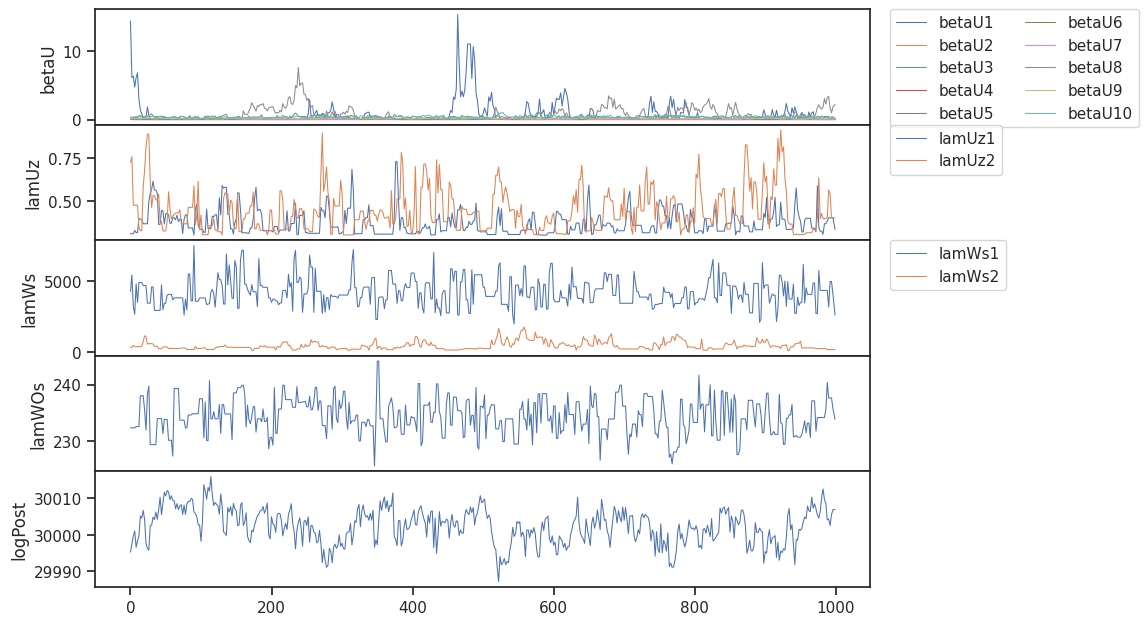

In [ ]:
sepia_data = sepia_data_format(p_all_train, y_vals_train, y_ind)
print(sepia_data)
model_filename = '../EarlyDarkEmu/model/multivariate_model_z_index' + str(z_index) 

sepia_model = do_pca(sepia_data, exp_variance=0.98)
sepia_model = do_gp_train(sepia_model, model_filename)
plot_train_diagnostics(sepia_model)

### Load existing model

In [ ]:
sepia_model = gp_load(sepia_model, model_filename)

### Single-redshift emulation for new cosmological parameters

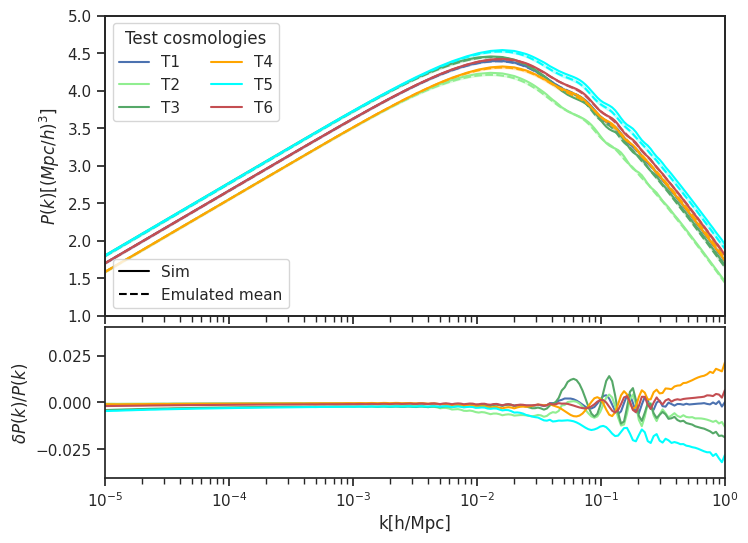

In [ ]:
# test_indices_rand = np.random.randint(size=3, low=0, high=input_params.shape[0])
test_indices_rand = np.arange(0, input_params.shape[0])
pred_mean, pred_quant = emulate(sepia_model, input_params[test_indices_rand])
# pred_quant == Emulated (0.05, 0.95) quantile
# validation_plot(k_all, target_vals[test_indices_rand], pred_mean, pred_quant, xy_lims=[1e-5, 1e0, 10, 5e4], y_log_scale=if_y_scale_plot_log);
validation_plot(k_all, target_vals[test_indices_rand], pred_mean, pred_quant, xy_lims=[1e-5, 1e0, 1, 5], y_log_plot_scale=if_y_scale_plot_log);

### Sensitivity analysis from the emulator 

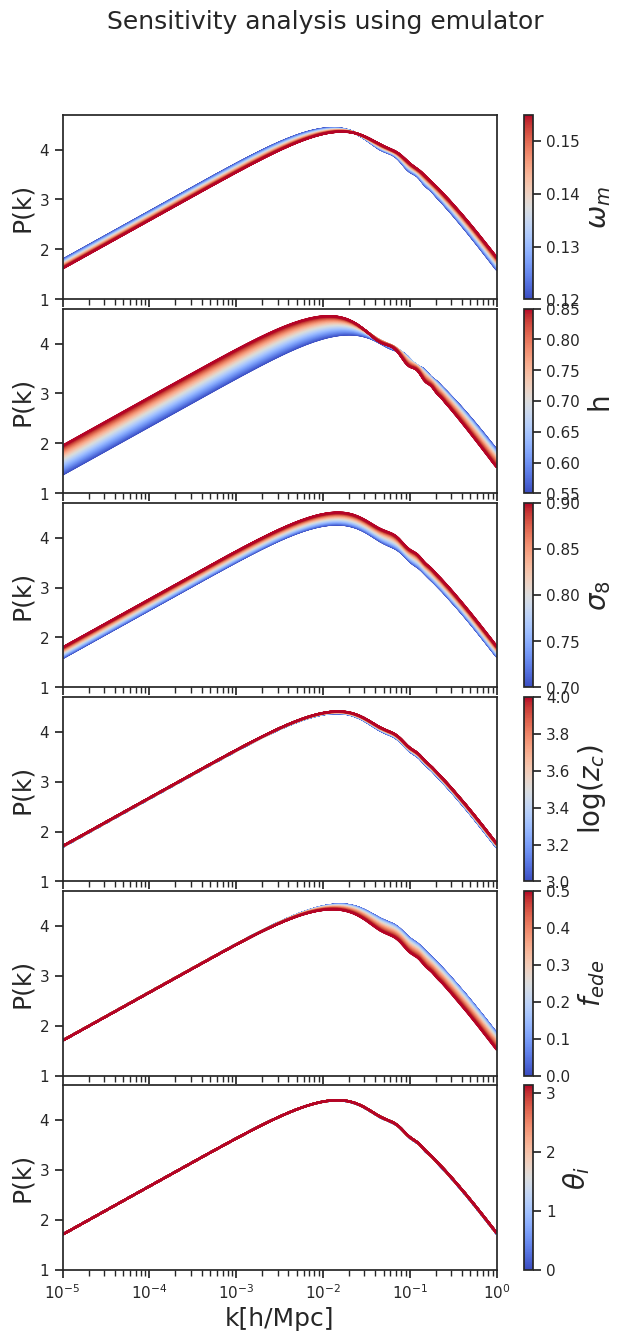

In [ ]:
# f = sensitivity_plot(k_all, p_all, sepia_model, emulate, PARAM_NAME, xy_lims = [1e-5, 1e0, 10, 5e4], y_log_plot_scale=if_y_scale_plot_log )
f = sensitivity_plot(k_all, p_all, sepia_model, emulate, PARAM_NAME, xy_lims = [1e-5, 1e0, 1, 4.7], y_log_plot_scale=if_y_scale_plot_log )

### Multi-redshift emulation

#### Train all the models

In [ ]:
if if_train_all:
    
    do_gp_train_multiple(model_dir='../EarlyDarkEmu/model/', 
                        p_train_all = p_all[train_indices],
                        y_vals_all = Pk_all[train_indices],
                        y_ind_all = k_all,
                        z_index_range=range(z_all.shape[0]))

Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:28<00:00,  1.76it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.20970901 0.60586939]
 [0.033553   0.14073253]
 [0.26077346 0.17308749]
 [0.03974212 0.13470666]
 [0.0036455  0.11632665]
 [0.00802522 0.40676585]
 [0.00094741 0.0369646 ]]
lamUz
[[0.5426721  0.68677208]]
lamWs
[[8543.82357123 1476.98807392]]
lamWOs
[[25.99746959]]


MCMC sampling: 100%|██████████| 1000/1000 [00:28<00:00, 34.88it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index0.pkl
Training complete for snapshot 0
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:27<00:00,  1.81it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.4979008  0.23049564]
 [0.03477508 0.12244047]
 [0.22251168 0.2085772 ]
 [0.03885035 0.1490095 ]
 [0.00469771 0.12999053]
 [0.0078861  0.36211009]
 [0.00189951 0.0295514 ]]
lamUz
[[0.41577138 0.76854224]]
lamWs
[[9092.26631335  805.08613203]]
lamWOs
[[30.28021056]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 34.24it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index1.pkl
Training complete for snapshot 1
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.68it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[2.90637439e+00 6.44738509e-01]
 [3.11747141e-02 1.13086717e-01]
 [2.45160672e-01 2.03420568e-01]
 [3.98040453e-02 1.17637062e-01]
 [3.70840586e-03 1.02916091e-01]
 [5.74251658e-03 4.68935054e-01]
 [2.19021930e-03 3.03438939e-02]]
lamUz
[[0.32427122 0.51313739]]
lamWs
[[8190.77780291 1469.32402269]]
lamWOs
[[28.40656985]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.89it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index2.pkl
Training complete for snapshot 2
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.67it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.44992855 0.16292882]
 [0.03418334 0.12227085]
 [0.23880099 0.23324211]
 [0.04063787 0.15370871]
 [0.00550386 0.09104792]
 [0.00596435 0.52384899]
 [0.00093755 0.04240164]]
lamUz
[[0.3376088 0.6384283]]
lamWs
[[9776.84547655 1760.95104761]]
lamWOs
[[27.24473689]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 33.05it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index3.pkl
Training complete for snapshot 3
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[4.95668188e-01 1.11559044e+00]
 [3.50585443e-02 1.24641422e-01]
 [2.63034149e-01 2.00282270e-01]
 [3.52188752e-02 1.54195249e-01]
 [5.16797116e-03 1.18009810e-01]
 [3.96862914e-03 3.71640556e-01]
 [1.10242216e-03 3.33462808e-02]]
lamUz
[[0.45474095 0.78614901]]
lamWs
[[7926.17304652  859.52437193]]
lamWOs
[[24.06754151]]


MCMC sampling: 100%|██████████| 1000/1000 [00:33<00:00, 30.01it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index4.pkl
Training complete for snapshot 4
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.67it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.73382331 0.1220993 ]
 [0.03364614 0.12896173]
 [0.25617709 0.16596003]
 [0.0452365  0.13559605]
 [0.00531432 0.09188982]
 [0.0049588  0.35885932]
 [0.00166726 0.02800417]]
lamUz
[[0.50968386 0.54913292]]
lamWs
[[8824.84493863  863.41821752]]
lamWOs
[[23.54449876]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.78it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index5.pkl
Training complete for snapshot 5
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.37904234 0.48264588]
 [0.03517373 0.13759595]
 [0.26509112 0.18178875]
 [0.03433604 0.14040928]
 [0.00862044 0.13519726]
 [0.0051411  0.42261262]
 [0.00202752 0.03107222]]
lamUz
[[0.43904026 0.67100494]]
lamWs
[[7985.20097091 1268.29308948]]
lamWOs
[[23.6251335]]


MCMC sampling: 100%|██████████| 1000/1000 [00:28<00:00, 35.67it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index6.pkl
Training complete for snapshot 6
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:30<00:00,  1.62it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.23074592 0.17501771]
 [0.03717022 0.11569062]
 [0.26265098 0.1807789 ]
 [0.0452454  0.16911867]
 [0.00637077 0.11410439]
 [0.00393618 0.40236869]
 [0.00064295 0.03185824]]
lamUz
[[0.62549836 0.63487444]]
lamWs
[[6708.72300781  927.992208  ]]
lamWOs
[[26.55504546]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.99it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index7.pkl
Training complete for snapshot 7
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.85454803 0.1982166 ]
 [0.03441943 0.12552805]
 [0.21978486 0.17077832]
 [0.03602521 0.12357594]
 [0.00796147 0.08707126]
 [0.00567165 0.41531838]
 [0.0024211  0.02805937]]
lamUz
[[0.38864234 0.48034157]]
lamWs
[[7171.92389533 1011.34447756]]
lamWOs
[[30.22055934]]


MCMC sampling: 100%|██████████| 1000/1000 [00:27<00:00, 36.34it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index8.pkl
Training complete for snapshot 8
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:28<00:00,  1.73it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.25062005 0.26349899]
 [0.03112029 0.12948879]
 [0.23736719 0.19807316]
 [0.03591669 0.14749616]
 [0.00870169 0.10451554]
 [0.00603768 0.39015697]
 [0.00140533 0.04426707]]
lamUz
[[0.62142907 0.56552964]]
lamWs
[[10814.20457666  1545.11586335]]
lamWOs
[[30.15940198]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.46it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index9.pkl
Training complete for snapshot 9
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.69it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.40883096 0.61739378]
 [0.03064377 0.14570252]
 [0.29801994 0.2071351 ]
 [0.02856017 0.14366025]
 [0.00704935 0.15661209]
 [0.00468436 0.3537129 ]
 [0.00082586 0.03486507]]
lamUz
[[0.41977478 0.71045926]]
lamWs
[[8560.46827895  968.88973437]]
lamWOs
[[30.24502639]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.82it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index10.pkl
Training complete for snapshot 10
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.68it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.92988856 1.01175478]
 [0.03886219 0.13137829]
 [0.27360393 0.19014667]
 [0.04766324 0.15050636]
 [0.00756564 0.08402937]
 [0.00462009 0.46865738]
 [0.00289884 0.03889958]]
lamUz
[[0.41920835 0.65517447]]
lamWs
[[8721.43379483 1099.67847574]]
lamWOs
[[36.69101847]]


MCMC sampling: 100%|██████████| 1000/1000 [00:31<00:00, 31.77it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index11.pkl
Training complete for snapshot 11
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:30<00:00,  1.64it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.39267034 0.34228453]
 [0.038434   0.11486198]
 [0.21849457 0.22299324]
 [0.0355143  0.12885823]
 [0.00963136 0.13362202]
 [0.00727217 0.53448165]
 [0.00151363 0.0442714 ]]
lamUz
[[0.54714089 0.82244812]]
lamWs
[[9115.6616438 1636.2058168]]
lamWOs
[[29.3195378]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.62it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index12.pkl
Training complete for snapshot 12
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[8.26160351e-01 1.48278917e+00]
 [3.14158724e-02 1.33895040e-01]
 [1.97934655e-01 1.89521540e-01]
 [3.48893971e-02 1.30833573e-01]
 [9.97209626e-03 1.09271141e-01]
 [1.39186488e-02 3.38843361e-01]
 [7.84350351e-04 2.75482250e-02]]
lamUz
[[0.47877096 0.80901089]]
lamWs
[[8272.43507665  885.01494501]]
lamWOs
[[25.61035093]]


MCMC sampling: 100%|██████████| 1000/1000 [00:28<00:00, 34.70it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index13.pkl
Training complete for snapshot 13
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:28<00:00,  1.73it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.52199672 0.10661693]
 [0.03134618 0.12541386]
 [0.19122251 0.19704529]
 [0.03292768 0.13589595]
 [0.01585477 0.13414225]
 [0.01357052 0.5026959 ]
 [0.00119978 0.03739957]]
lamUz
[[0.42519447 0.57720687]]
lamWs
[[10225.54667701  2194.89443066]]
lamWOs
[[21.86897426]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.42it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index14.pkl
Training complete for snapshot 14
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.54952259 0.58831538]
 [0.02516529 0.12354065]
 [0.23803546 0.17379555]
 [0.03186735 0.12653504]
 [0.01115365 0.17897642]
 [0.00761067 0.3619022 ]
 [0.00147182 0.02881029]]
lamUz
[[0.43175062 0.58422021]]
lamWs
[[8466.26017734 1007.87890138]]
lamWOs
[[29.32652207]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.93it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index15.pkl
Training complete for snapshot 15
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.69it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.49317002 0.47768548]
 [0.02580426 0.12043772]
 [0.19965467 0.23515363]
 [0.03448888 0.12001222]
 [0.01593138 0.09186258]
 [0.01216191 0.5633362 ]
 [0.00169288 0.03810221]]
lamUz
[[0.36241551 0.60133915]]
lamWs
[[9136.70820194 1499.64582926]]
lamWOs
[[32.93899338]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.96it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index16.pkl
Training complete for snapshot 16
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.68593457 1.49165483]
 [0.03359554 0.1416386 ]
 [0.20040238 0.17532136]
 [0.0388479  0.14567751]
 [0.01253156 0.14024732]
 [0.01380356 0.34191023]
 [0.00205732 0.03122637]]
lamUz
[[0.3280511  0.64385019]]
lamWs
[[12364.27930494  1350.48628643]]
lamWOs
[[32.27697024]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.89it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index17.pkl
Training complete for snapshot 17
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:30<00:00,  1.67it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.80807336 0.31513932]
 [0.03214992 0.14277619]
 [0.16708016 0.2113697 ]
 [0.0355983  0.13566553]
 [0.01210561 0.10561618]
 [0.02139961 0.48824337]
 [0.00116079 0.02798466]]
lamUz
[[0.38285058 0.73626009]]
lamWs
[[9299.10183266 1157.8348937 ]]
lamWOs
[[31.91199502]]


MCMC sampling: 100%|██████████| 1000/1000 [00:31<00:00, 31.46it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index18.pkl
Training complete for snapshot 18
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[1.05987737e+00 1.16889644e+00]
 [3.14484048e-02 1.48545156e-01]
 [2.19276881e-01 1.97013423e-01]
 [3.52547923e-02 1.30661351e-01]
 [2.25215726e-02 8.10833328e-02]
 [1.77789268e-02 4.99564631e-01]
 [4.29707986e-04 2.67689337e-02]]
lamUz
[[0.40521322 0.54822217]]
lamWs
[[9171.12333253 1606.62306759]]
lamWOs
[[37.55123063]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.72it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index19.pkl
Training complete for snapshot 19
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.67it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[2.75044542e-01 8.05389792e-01]
 [2.70382345e-02 1.33728290e-01]
 [1.85580949e-01 2.53051076e-01]
 [3.10053566e-02 1.24603388e-01]
 [1.81238045e-02 9.85887334e-02]
 [1.75132792e-02 4.73841892e-01]
 [5.32206530e-04 3.64938800e-02]]
lamUz
[[0.35982961 0.53549376]]
lamWs
[[9147.13040283 1273.20296985]]
lamWOs
[[25.6929832]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 34.07it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index20.pkl
Training complete for snapshot 20
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.13572497 0.77869474]
 [0.02928414 0.1354262 ]
 [0.19460882 0.20453438]
 [0.04016356 0.15252652]
 [0.01556564 0.0987    ]
 [0.01749795 0.49791766]
 [0.00232789 0.02408966]]
lamUz
[[0.42293691 0.50890842]]
lamWs
[[8383.538843   1418.89114299]]
lamWOs
[[30.55646977]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.55it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index21.pkl
Training complete for snapshot 21
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.67it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.41448692 0.58515119]
 [0.02545292 0.15951761]
 [0.18420736 0.23801046]
 [0.03638805 0.15187919]
 [0.01417497 0.10522005]
 [0.02060247 0.65807544]
 [0.00154195 0.038042  ]]
lamUz
[[0.34348389 0.96125024]]
lamWs
[[10170.95892922  1336.84064258]]
lamWOs
[[35.63616852]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.88it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index22.pkl
Training complete for snapshot 22
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:30<00:00,  1.67it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.56755098 0.43036899]
 [0.02568088 0.12977142]
 [0.18649233 0.20319798]
 [0.02912338 0.14138078]
 [0.01797417 0.22240612]
 [0.01898377 0.33425015]
 [0.00057262 0.0375933 ]]
lamUz
[[0.33552406 0.60053529]]
lamWs
[[12483.34342552  1943.21915311]]
lamWOs
[[34.24651237]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 33.03it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index23.pkl
Training complete for snapshot 23
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:30<00:00,  1.66it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.45850516 0.29878042]
 [0.03331012 0.13962794]
 [0.20404612 0.22597292]
 [0.03886735 0.14495945]
 [0.01960338 0.15797462]
 [0.01897812 0.43092219]
 [0.00082624 0.03718507]]
lamUz
[[0.29149386 0.61222339]]
lamWs
[[8248.3855438  1687.15194946]]
lamWOs
[[35.29662736]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.47it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index24.pkl
Training complete for snapshot 24
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.69it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.75010587 1.37856698]
 [0.02618374 0.12873523]
 [0.18958448 0.19834237]
 [0.03310506 0.15400896]
 [0.01647021 0.09946902]
 [0.01886244 0.49657995]
 [0.00185017 0.04155652]]
lamUz
[[0.2543177  0.80811848]]
lamWs
[[9688.59426815 1188.66982555]]
lamWOs
[[32.34059182]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 33.24it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index25.pkl
Training complete for snapshot 25
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:31<00:00,  1.58it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.76238319 0.24695593]
 [0.03019244 0.14330294]
 [0.20289785 0.2145591 ]
 [0.02873347 0.14230398]
 [0.01813152 0.11145293]
 [0.02112033 0.36704049]
 [0.00247115 0.0366412 ]]
lamUz
[[0.3360002  0.70111892]]
lamWs
[[8914.84480688 1200.26239492]]
lamWOs
[[37.48328953]]


MCMC sampling: 100%|██████████| 1000/1000 [00:31<00:00, 32.04it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index26.pkl
Training complete for snapshot 26
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.58037606 0.48807161]
 [0.0239211  0.14933699]
 [0.15809064 0.24157884]
 [0.0348664  0.18245235]
 [0.01513342 0.100462  ]
 [0.02276366 0.55750387]
 [0.00222131 0.03603694]]
lamUz
[[0.23970026 0.88274246]]
lamWs
[[9463.75357034 1154.60662582]]
lamWOs
[[39.59157349]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.40it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index27.pkl
Training complete for snapshot 27
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.68it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[1.88683027e-01 1.87661375e+00]
 [2.67108156e-02 1.59925187e-01]
 [1.70395221e-01 2.30368370e-01]
 [3.41686170e-02 1.50412834e-01]
 [1.62619391e-02 9.93823389e-02]
 [2.47494459e-02 5.13858413e-01]
 [1.16943805e-03 3.84555071e-02]]
lamUz
[[0.40005877 0.84039836]]
lamWs
[[8148.60810745 1127.37017918]]
lamWOs
[[39.24259869]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 34.01it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index28.pkl
Training complete for snapshot 28
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.67it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.61488865 0.93199481]
 [0.03288311 0.14547687]
 [0.18659231 0.20408236]
 [0.02954707 0.14586229]
 [0.01646884 0.10121824]
 [0.02304388 0.50309038]
 [0.0016277  0.03805113]]
lamUz
[[0.32540124 0.63814972]]
lamWs
[[9898.42884411 1934.24695317]]
lamWOs
[[35.007818]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.66it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index29.pkl
Training complete for snapshot 29
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.68it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.17681385 0.2193166 ]
 [0.02936279 0.13629733]
 [0.17482012 0.18830498]
 [0.03761531 0.13899651]
 [0.01944316 0.23004716]
 [0.0222258  0.38895476]
 [0.00136105 0.01979019]]
lamUz
[[0.31988048 0.60920274]]
lamWs
[[8833.88536442 1580.48113794]]
lamWOs
[[35.6825007]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.87it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index30.pkl
Training complete for snapshot 30
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.69it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.20664995 0.35660226]
 [0.02217772 0.13097453]
 [0.16071695 0.23117447]
 [0.02862192 0.14203996]
 [0.01292742 0.09786099]
 [0.01934523 0.3647025 ]
 [0.0008923  0.03075401]]
lamUz
[[0.23474051 0.78690322]]
lamWs
[[9687.42535032  959.12896423]]
lamWOs
[[35.87242226]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.53it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index31.pkl
Training complete for snapshot 31
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.68it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.37622202 0.38305287]
 [0.03125246 0.13939713]
 [0.18475146 0.19156943]
 [0.02924858 0.15580146]
 [0.01958253 0.09515148]
 [0.02211001 0.47996215]
 [0.00127924 0.03524292]]
lamUz
[[0.38387804 0.81374924]]
lamWs
[[11686.16687406  1082.49850765]]
lamWOs
[[35.48365636]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.37it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index32.pkl
Training complete for snapshot 32
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.68it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.3423449  0.6211854 ]
 [0.02575475 0.15780997]
 [0.18521936 0.21892798]
 [0.03442484 0.15531681]
 [0.01536156 0.12334263]
 [0.02520202 0.40965342]
 [0.00077303 0.02327644]]
lamUz
[[0.41368513 0.76882053]]
lamWs
[[8656.88172584  606.75817706]]
lamWOs
[[35.27159952]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.57it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index33.pkl
Training complete for snapshot 33
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[3.03156693e-01 8.07729183e-01]
 [2.36126582e-02 1.34548263e-01]
 [1.80094043e-01 2.05415361e-01]
 [3.40609517e-02 1.26752494e-01]
 [1.71926165e-02 8.78554832e-02]
 [2.02617932e-02 4.72279954e-01]
 [6.29133724e-04 2.27402036e-02]]
lamUz
[[0.31186855 0.55152922]]
lamWs
[[11165.85676845  1164.00287033]]
lamWOs
[[34.94867978]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 33.14it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index34.pkl
Training complete for snapshot 34
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.71it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.08442376 0.25647793]
 [0.02557221 0.15322869]
 [0.19916007 0.22485408]
 [0.03204644 0.13058369]
 [0.01711572 0.11042702]
 [0.02908061 0.45202694]
 [0.0013206  0.03033003]]
lamUz
[[0.28786421 0.84593087]]
lamWs
[[11642.18299214   817.8057013 ]]
lamWOs
[[42.28015941]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 33.09it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index35.pkl
Training complete for snapshot 35
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:30<00:00,  1.65it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.87158836 0.54060794]
 [0.03325593 0.16422018]
 [0.20124531 0.18686207]
 [0.03178987 0.14173468]
 [0.01793794 0.1318504 ]
 [0.02438091 0.42089489]
 [0.00111006 0.02244257]]
lamUz
[[0.37946413 0.86617741]]
lamWs
[[8936.11400721  868.26372694]]
lamWOs
[[36.70041704]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 33.06it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index36.pkl
Training complete for snapshot 36
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:30<00:00,  1.64it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.35077097 0.26151983]
 [0.02669649 0.13245789]
 [0.21572325 0.21901038]
 [0.03294372 0.14231072]
 [0.01669629 0.08872161]
 [0.02483743 0.58846758]
 [0.00130681 0.03930265]]
lamUz
[[0.32960475 0.95347072]]
lamWs
[[9265.11503496 1451.04885524]]
lamWOs
[[30.35604809]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.40it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index37.pkl
Training complete for snapshot 37
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.67it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.39958443 0.47898006]
 [0.02764219 0.12363342]
 [0.16849672 0.207057  ]
 [0.03332583 0.13139034]
 [0.01471663 0.09483931]
 [0.02368407 0.47220567]
 [0.00114563 0.05023638]]
lamUz
[[0.29828143 0.66821306]]
lamWs
[[10560.68010011  1993.90254044]]
lamWOs
[[33.56461689]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 34.36it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index38.pkl
Training complete for snapshot 38
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.68it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.14418374 0.16325195]
 [0.0338165  0.11225393]
 [0.20976273 0.23027829]
 [0.03183546 0.13420499]
 [0.01600547 0.10989132]
 [0.02681909 0.5497371 ]
 [0.00091189 0.04379551]]
lamUz
[[0.36062678 0.64774892]]
lamWs
[[9867.33017366 1620.74705266]]
lamWOs
[[44.89603298]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.80it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index39.pkl
Training complete for snapshot 39
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:28<00:00,  1.73it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[1.00859702e+00 2.82605761e-01]
 [2.38569163e-02 1.28706104e-01]
 [2.00013924e-01 2.04835889e-01]
 [3.16307396e-02 1.72283597e-01]
 [1.56810707e-02 9.02495557e-02]
 [3.43942537e-02 5.44978884e-01]
 [9.19700986e-04 4.43251221e-02]]
lamUz
[[0.46298014 0.85800481]]
lamWs
[[11485.18185049  2181.51351139]]
lamWOs
[[45.40164804]]


MCMC sampling: 100%|██████████| 1000/1000 [00:26<00:00, 37.25it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index40.pkl
Training complete for snapshot 40
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:27<00:00,  1.80it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.5597082  0.18276977]
 [0.03235445 0.13606836]
 [0.19517614 0.20370033]
 [0.02712011 0.1146993 ]
 [0.01911302 0.11299347]
 [0.02120026 0.43206029]
 [0.00121919 0.0476733 ]]
lamUz
[[0.31378186 0.62481726]]
lamWs
[[10439.23513316  2135.90783758]]
lamWOs
[[39.78148008]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.36it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index41.pkl
Training complete for snapshot 41
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.68it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.24393743 0.32578083]
 [0.02517179 0.12959477]
 [0.17875129 0.20875851]
 [0.03089844 0.14226035]
 [0.01892656 0.13514432]
 [0.02484256 0.38707418]
 [0.00092573 0.02702308]]
lamUz
[[0.34144198 0.61763036]]
lamWs
[[11501.09995694   984.43691896]]
lamWOs
[[45.22112428]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 33.30it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index42.pkl
Training complete for snapshot 42
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.71it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.16373325 0.26694301]
 [0.02809263 0.15128736]
 [0.16333219 0.2614293 ]
 [0.03371126 0.14008845]
 [0.01705275 0.09778491]
 [0.02350575 0.57341894]
 [0.00199324 0.04618636]]
lamUz
[[0.24196304 0.80517033]]
lamWs
[[8758.23993958 1900.67626361]]
lamWOs
[[46.77049272]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 34.31it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index43.pkl
Training complete for snapshot 43
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:28<00:00,  1.74it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.57925922 0.17766099]
 [0.02448328 0.1309345 ]
 [0.20089129 0.24161889]
 [0.02836117 0.12805021]
 [0.01679325 0.17828778]
 [0.02352311 0.47769988]
 [0.00117153 0.02467652]]
lamUz
[[0.34106437 0.61310136]]
lamWs
[[9684.12408551 1178.13202686]]
lamWOs
[[39.39672542]]


MCMC sampling: 100%|██████████| 1000/1000 [00:28<00:00, 34.54it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index44.pkl
Training complete for snapshot 44
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:27<00:00,  1.81it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.32130408 0.70141907]
 [0.02559088 0.13756828]
 [0.19199193 0.22621417]
 [0.02994225 0.15206766]
 [0.01842699 0.09467838]
 [0.0221863  0.56918941]
 [0.00251472 0.02995953]]
lamUz
[[0.48981879 0.77821585]]
lamWs
[[7572.08599429 2199.25052135]]
lamWOs
[[36.72689192]]


MCMC sampling: 100%|██████████| 1000/1000 [00:28<00:00, 35.04it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index45.pkl
Training complete for snapshot 45
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:27<00:00,  1.79it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.08147213 0.21456786]
 [0.02322605 0.12069645]
 [0.15239871 0.18348922]
 [0.03350055 0.13223665]
 [0.01749044 0.13093299]
 [0.02390168 0.43205896]
 [0.00199388 0.02845088]]
lamUz
[[0.23800983 0.56052284]]
lamWs
[[8585.84992221  791.28426427]]
lamWOs
[[47.05761652]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.82it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index46.pkl
Training complete for snapshot 46
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:27<00:00,  1.79it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[7.38326864e-01 8.06654905e-01]
 [2.98230273e-02 1.12072045e-01]
 [2.26324710e-01 2.49688167e-01]
 [3.09692268e-02 1.20182377e-01]
 [1.88649276e-02 9.63335700e-02]
 [2.46106712e-02 5.83365659e-01]
 [6.08186233e-04 3.30175461e-02]]
lamUz
[[0.36133639 0.43584567]]
lamWs
[[9606.62536576 1679.92051418]]
lamWOs
[[39.59157349]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.89it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index47.pkl
Training complete for snapshot 47
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:30<00:00,  1.66it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.48475826 0.24020654]
 [0.02766778 0.12791728]
 [0.21208086 0.18741653]
 [0.02976675 0.13810842]
 [0.01827735 0.19054544]
 [0.02055576 0.43502166]
 [0.0013673  0.02319434]]
lamUz
[[0.49402856 0.72397105]]
lamWs
[[10393.55693297  1824.66170181]]
lamWOs
[[38.31947267]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.72it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index48.pkl
Training complete for snapshot 48
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.67it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[6.31947435e-01 1.44382441e+00]
 [3.22038524e-02 1.34497282e-01]
 [1.89670031e-01 2.10222776e-01]
 [3.02832169e-02 1.54356437e-01]
 [1.71787886e-02 1.16257081e-01]
 [2.68299977e-02 4.40494600e-01]
 [1.03866810e-03 3.81293820e-02]]
lamUz
[[0.33630462 0.78559923]]
lamWs
[[8962.56314529  755.06157942]]
lamWOs
[[47.2270263]]


MCMC sampling: 100%|██████████| 1000/1000 [00:29<00:00, 33.77it/s]


Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index49.pkl
Training complete for snapshot 49
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:29<00:00,  1.68it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.49900676 0.72720509]
 [0.02862476 0.12138206]
 [0.1687026  0.20637725]
 [0.04017259 0.13697761]
 [0.02152988 0.10746276]
 [0.01945305 0.49659793]
 [0.00101801 0.04383816]]
lamUz
[[0.30613925 0.61366791]]
lamWs
[[7878.97302738 1743.19667944]]
lamWOs
[[41.41654843]]


MCMC sampling: 100%|██████████| 1000/1000 [00:30<00:00, 32.88it/s]

Model saved to ../EarlyDarkEmu/model/multivariate_model_z_index50.pkl
Training complete for snapshot 50
Model saved at ../EarlyDarkEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*


#### Load all trained models 

In [ ]:
sepia_model_list = load_model_multiple(model_dir='../EarlyDarkEmu/model/', 
                                        p_train_all=p_all[train_indices],
                                        y_vals_all=Pk_all[train_indices],
                                        y_ind_all=k_all,
                                        z_index_range=range(z_all.shape[0]), 
                                        sepia_model_i=sepia_model)

Number of models loaded: 51


[[0.1375 0.7    0.7    3.5    0.47   1.57   0.05  ]]


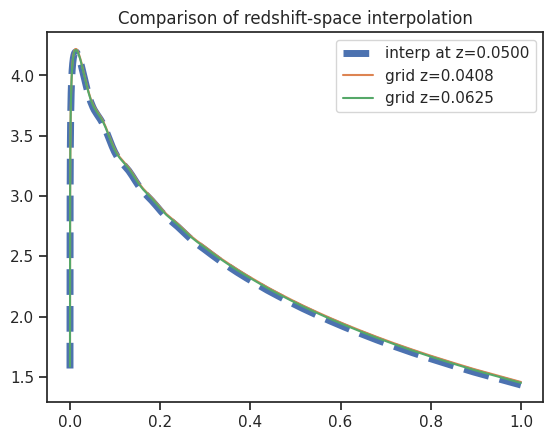

In [ ]:
#| hide

#### Emulator uncertainty across parameter range


input_params0 = input_params[1]
z_inputs = 0.05
input_params_and_redshift = np.append(input_params0, z_inputs)
print(input_params_and_redshift[np.newaxis, :])


emulated_with_redshift, emulated_with_redshift_err = emu_redshift(input_params_and_redshift[np.newaxis, :], sepia_model_list, z_all)


plt.figure(433)
plt.plot(k_all, emulated_with_redshift[:, 0], label='interp at z=%.4f'%input_params_and_redshift[-1], lw=5, ls='--')
plt.plot(k_all, emulate(sepia_model_list[0], input_params_and_redshift[:-1])[0], label='grid z=%.4f'%z_all[2])
plt.plot(k_all, emulate(sepia_model_list[1], input_params_and_redshift[:-1])[0], label='grid z=%.4f'%z_all[3])
plt.legend()
plt.title('Comparison of redshift-space interpolation')
# plt.plot(k_all, emulate(sepia_model_list[0], input_params))
# plt.plot(k_all, emulate(sepia_model_list[0], input_params))

plt.show()

#### Emulator confidence across parameter range

In [ ]:
# Parameter settings
steps = 20  # Number of steps in the grid for each parameter
param_name_extended = np.append(PARAM_NAME, 'Redshift')
red_min = 0
red_max = 3
red_mean = 1.0

param_min = np.append(p_all.min(axis=0), red_min)
param_max = np.append(p_all.max(axis=0), red_max)
param_mean = np.append(p_all.mean(axis=0), red_mean)

# Compute outputs and errors for a range of parameter values
def compute_errors(param_grid):
    print(param_grid.shape)
    errors = np.zeros(shape=(param_grid.shape[0], ))
    # errors = np.array([np.mean(emu_redshift(params[np.newaxis, :], sepia_model_list, z_all)[1][:, 0, :]**2) for params in param_grid])
    for par_indx in range(errors.shape[0]):

        errors[par_indx] = np.mean(emu_redshift(param_grid[par_indx][np.newaxis, :], sepia_model_list, z_all)[1][:, 0, :]**2)

    return errors.reshape(steps, steps)


# Example usage:
param_indices = [3, 4]  # Indices of parameters to vary
fixed_indices = [i for i in range(len(param_name_extended)) if i not in param_indices]
fixed_params = {param_name_extended[i]: param_mean[i] for i in fixed_indices}

param_grid = generate_param_grid_with_fixed(param_name_extended, param_indices, fixed_params, param_min, param_max, steps)

In [ ]:
errors = compute_errors(param_grid)

(400, 7)


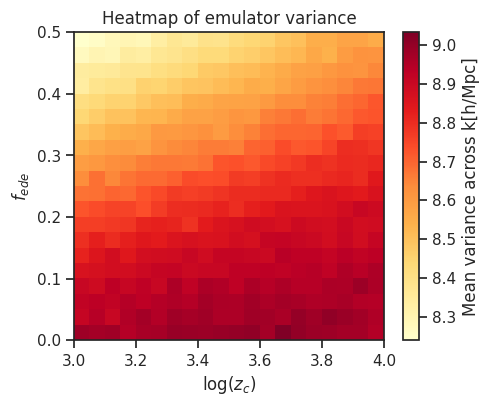

In [ ]:
f = plot_error_heatmap(errors, [param_name_extended[i] for i in param_indices], [(param_min[param_indices[0]], param_max[param_indices[0]]), (param_min[param_indices[1]], param_max[param_indices[1]])])

if if_savefig: 
    f.savefig('../../../Plots/heatmap_params_4_5.png', bbox_inches='tight')

### Parameter inference via MCMC using the emulator

In [ ]:
#| hide 

ndim = 6
nwalkers = 50  # 500
nrun_burn = 100  # 300
nrun = 500  # 1000

#### Creating mock observational data

In [ ]:

create_mock_obs = False

if create_mock_obs: 
    target_indx = 0 #0 ,14, 35
    z_index = 2
    L = 32
    fake_obs_data_index_every = 2

    redshift = z_all[z_index]
    x_target_mcmc = k_all[::fake_obs_data_index_every]
    y_target_mcmc = Pk_all[:, z_index, :][target_indx][::fake_obs_data_index_every]

    if not if_pk_log: y_target_mcmc = y_target_mcmc*(1 + np.random.normal(0.0, 0.5, size=y_target_mcmc.shape))
    if if_pk_log: y_target_mcmc = y_target_mcmc*(1 + 0.02*np.random.normal(0.0, 1, size=y_target_mcmc.shape))

    if not if_pk_log: yerr_target_mcmc = np.sqrt( Pk_all[:, z_index, :][target_indx][::fake_obs_data_index_every]*(L**3))/((0.1*L)**3)
    if if_pk_log: yerr_target_mcmc = np.sqrt( Pk_all[:, z_index, :][target_indx][::fake_obs_data_index_every]*(L**3))/((0.5*L)**3)

    x_grid = k_all
    params_calib = p_all[target_indx][:, np.newaxis].T
    print('redshift: ', redshift)



In [ ]:
if not create_mock_obs:
    redshift = 0.0

    k_sdss, pk_sdss, pk_error_sdss = load_sdss()
    k_wmap, pk_wmap, pk_error_wmap = load_wmap()


    x_target_mcmc = np.concatenate([k_sdss, k_wmap])
    y_target_mcmc = np.concatenate([pk_sdss, pk_wmap])

    yerr_target_mcmc = np.concatenate([pk_error_sdss, pk_error_wmap])

    params_calib = [[0.1375, 0.7, 0.8, 3.531, 0.1, 2.72]]  ## Best EDE values from 1908.06995
    x_grid = k_all

    

<matplotlib.legend.Legend>

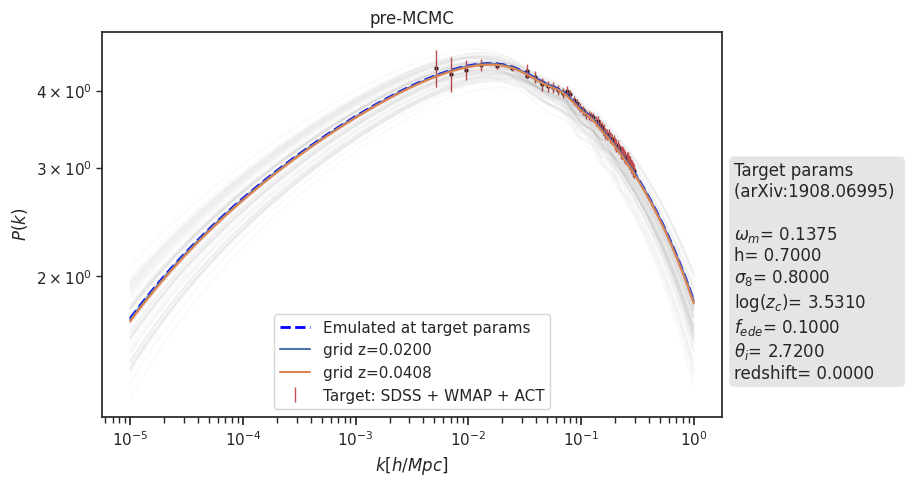

In [ ]:

f, a = plt.subplots(1,1, figsize = (8, 5)) 
input_params_and_redshift = np.append(params_calib, redshift)
bk_target, err_target = emu_redshift(input_params_and_redshift[np.newaxis, :], sepia_model_list, z_all)
a.plot(k_all, bk_target[:, 0], label='Emulated at target params', lw=2, ls='--', color='blue')

if create_mock_obs:
    data_label = 'Target mock observations'
else: 
    data_label = 'Target: SDSS + WMAP + ACT'

a.errorbar(x_target_mcmc, y_target_mcmc, yerr_target_mcmc, label=data_label, ls='none', lw=1, color = "r")
a.scatter(x_target_mcmc, y_target_mcmc, s = 5, marker = "h", color = "k")


a.plot(k_all, Pk_all[:, z_index, :].T, 'k', alpha=0.02)


plt.plot(k_all, emulate(sepia_model_list[z_index], input_params_and_redshift[:-1])[0], label='grid z=%.4f'%z_all[z_index])
plt.plot(k_all, emulate(sepia_model_list[z_index+1], input_params_and_redshift[:-1])[0], label='grid z=%.4f'%z_all[z_index + 1])



if create_mock_obs: string_print0 = 'Target Params \n (from sim) \n\n' 
if not create_mock_obs: string_print0 = 'Target params \n(arXiv:1908.06995) \n\n' 

string_print1 = PARAM_NAME[0] + '= %.4f'%input_params_and_redshift[0] + '\n'
string_print2 = PARAM_NAME[1] + '= %.4f'%input_params_and_redshift[1] + '\n'
string_print3 = PARAM_NAME[2] + '= %.4f'%input_params_and_redshift[2] + '\n'
string_print4 = PARAM_NAME[3] + '= %.4f'%input_params_and_redshift[3] + '\n'
string_print5 = PARAM_NAME[4] + '= %.4f'%input_params_and_redshift[4] + '\n'
string_print6 = PARAM_NAME[5] + '= %.4f'%input_params_and_redshift[5] + '\n'
string_print8 = 'redshift' + '= %.4f'%input_params_and_redshift[6] 


string_print = string_print0 + string_print1 + string_print2 + string_print3 + string_print4 + string_print5 + string_print6  + string_print8

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
plt.text(1.02, 0.1, string_print, transform=a.transAxes, fontsize=12, bbox=props)


a.set_xscale('log')
a.set_yscale('log')
plt.title('pre-MCMC')
a.set_xlabel(r'$k [h/Mpc]$')
a.set_ylabel(r'$P(k)$')
plt.legend()

In [ ]:
#| hide 

allMax = np.max(p_all, axis = 0)
allMin = np.min(p_all, axis = 0)
allMean = np.mean(p_all, axis = 0)

param1 = [PARAM_NAME[0], params_calib[0][0], allMin[0], allMax[0]] 
param2 = [PARAM_NAME[1], params_calib[0][1], allMin[1], allMax[1]]
param3 = [PARAM_NAME[2], params_calib[0][2], allMin[2], allMax[2]]
param4 = [PARAM_NAME[3], params_calib[0][3], allMin[3], allMax[3]]
param5 = [PARAM_NAME[4], params_calib[0][4], allMin[4], allMax[4]]
param6 = [PARAM_NAME[5], params_calib[0][5], allMin[5], allMax[5]]


# param1 = [PARAM_NAME[0], allMean[0], allMin[0], allMax[0]] 
# param2 = [PARAM_NAME[1], allMean[1], allMin[1], allMax[1]]
# param3 = [PARAM_NAME[2], allMean[2], allMin[2], allMax[2]]
# param4 = [PARAM_NAME[3], allMean[3], allMin[3], allMax[3]]
# param5 = [PARAM_NAME[4], allMean[4], allMin[4], allMax[4]]
# param6 = [PARAM_NAME[5], allMean[5], allMin[5], allMax[5]]
# param7 = [PARAM_NAME[6], allMean[6], allMin[6], allMax[6]]

params_list = [param1, param2, param3, param4, param5, param6]

In [ ]:
pos0 = chain_init(params_list, ndim, nwalkers)

sampler = define_sampler(redshift, ndim, nwalkers, params_list, x_grid, sepia_model_list, z_all, x_target_mcmc, y_target_mcmc, yerr_target_mcmc)

##### MCMC run - first burn, then full. 


Burn-in phase
time (minutes): 5.770504713058472


100%|██████████| 100/100 [04:33<00:00,  2.73s/it]


mcmc results: 0.13974134045443926 0.682913747987538 0.8023922479289773 3.529626654357127 0.10634971254502855 2.722099956944856


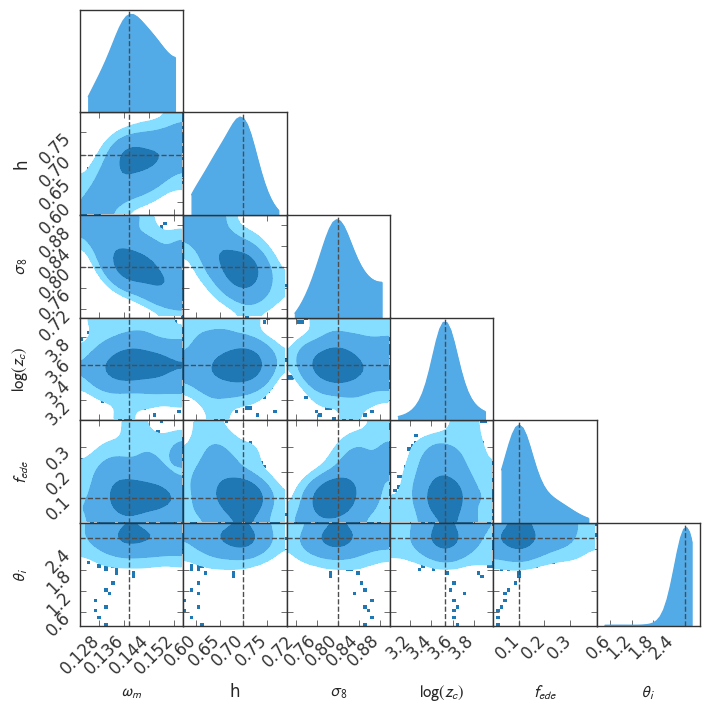

In [ ]:

pos, prob, state, samples, sampler, autocorr, index = do_mcmc(sampler, pos0, nrun_burn, ndim, if_burn=True)

if if_mcmc_all: # Full MCMC-run, will be slow
    pos, prob, state, samples, sampler, autocorr, index = do_mcmc(sampler, pos, nrun, ndim, if_burn=False)

p_mcmc = mcmc_results(samples)

fig = plot_mcmc(samples, params_list, if_truth_know=True)
# if if_savefig: 
#     plt.savefig('../../../Plots/mcmc_plot.png', bbox_inches='tight')

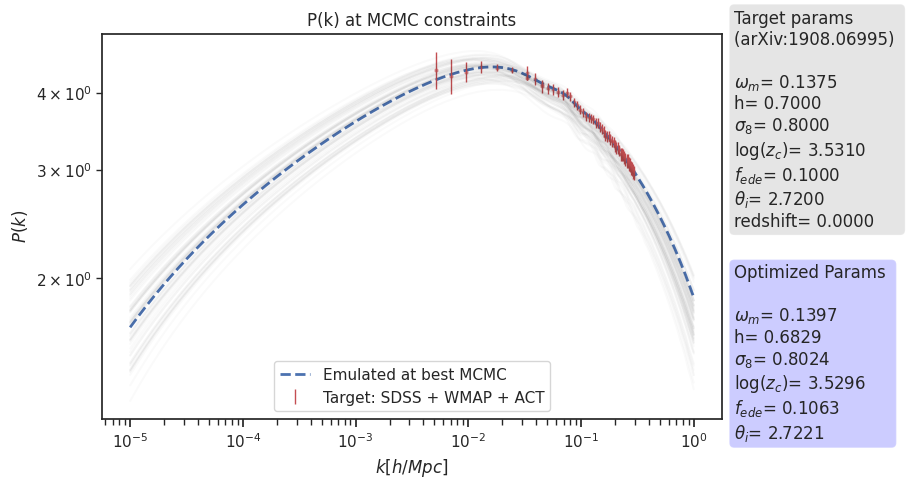

In [ ]:

f, a = plt.subplots(1,1, figsize = (8, 5)) 
input_params_and_redshift = np.append(p_mcmc, redshift)
bk_mcmc, err_mcmc = emu_redshift(input_params_and_redshift[np.newaxis, :], sepia_model_list, z_all)
a.plot(k_all, bk_mcmc[:, 0], label='Emulated at best MCMC', lw=2, ls='--')
a.errorbar(x_target_mcmc, y_target_mcmc, yerr_target_mcmc, label=data_label, ls='none', lw=1, color = "r")
a.scatter(x_target_mcmc, y_target_mcmc, s = 5, marker = "h", color = "r", alpha=0.5)

a.plot(k_all, Pk_all[:, z_index, :].T, 'k', alpha=0.02)


# plt.plot(k_all, emulate(sepia_model_list[z_index], input_params_and_redshift[:-1])[0], label='Z1')
# plt.plot(k_all, emulate(sepia_model_list[z_index+1], input_params_and_redshift[:-1])[0], label='Z2')


string_print1 = PARAM_NAME[0] + '= %.4f'%params_calib[0][0] + '\n'
string_print2 = PARAM_NAME[1] + '= %.4f'%params_calib[0][1] + '\n'
string_print3 = PARAM_NAME[2] + '= %.4f'%params_calib[0][2] + '\n'
string_print4 = PARAM_NAME[3] + '= %.4f'%params_calib[0][3] + '\n'
string_print5 = PARAM_NAME[4] + '= %.4f'%params_calib[0][4] + '\n'
string_print6 = PARAM_NAME[5] + '= %.4f'%params_calib[0][5] + '\n'
string_print8 = 'redshift' + '= %.4f'%redshift


string_print = string_print0 + string_print1 + string_print2 + string_print3 + string_print4 + string_print5 + string_print6  + string_print8

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
plt.text(1.02, 0.5, string_print, transform=a.transAxes, fontsize=12, bbox=props)

string_print0_mcmc = 'Optimized Params \n\n' 
string_print1_mcmc = PARAM_NAME[0] + '= %.4f'%p_mcmc[0] + '\n'
string_print2_mcmc = PARAM_NAME[1] + '= %.4f'%p_mcmc[1] + '\n'
string_print3_mcmc = PARAM_NAME[2] + '= %.4f'%p_mcmc[2] + '\n'
string_print4_mcmc = PARAM_NAME[3] + '= %.4f'%p_mcmc[3] + '\n'
string_print5_mcmc = PARAM_NAME[4] + '= %.4f'%p_mcmc[4] + '\n'
string_print6_mcmc = PARAM_NAME[5] + '= %.4f'%p_mcmc[5]

string_print_mcmc = string_print0_mcmc + string_print1_mcmc + string_print2_mcmc + string_print3_mcmc + string_print4_mcmc + string_print5_mcmc + string_print6_mcmc 

props = dict(boxstyle='round', facecolor='blue', alpha=0.2)
plt.text(1.02, -0.05, string_print_mcmc, transform=a.transAxes, fontsize=12, bbox=props)



a.set_xscale('log')
a.set_yscale('log')
plt.title('P(k) at MCMC constraints')
a.set_xlabel(r'$k [h/Mpc]$')
a.set_ylabel(r'$P(k)$')
plt.legend()

if if_savefig: 
    plt.savefig('../../../Plots/mcmc_results_Bk.png', bbox_inches='tight')


In [ ]:
#| hide


if if_mcmc_all:
    tau = sampler.get_autocorr_time(tol=0)
    print(tau)

    plt.figure(43)
    plt.plot(prob)
    plt.show()
    if if_savefig: 
        plt.savefig('../../../Plots/prob_plot.png', bbox_inches='tight')

    # selected_indices_for_plot = [0, 2, 4]
    # fig = plot_mcmc(samples[:, selected_indices_for_plot], [params_list[i] for i in selected_indices_for_plot], if_truth_know=True)

    # if if_savefig: 
    #     plt.savefig('../../../Plots/mcmc_plot_reduced_params.png', bbox_inches='tight')

In [ ]:
#| hide


def plot_convergence(sampler, params_list, nrun, ndim, nwalkers):
    n_params = len(params_list)  # Number of parameters
    fig, ax = plt.subplots(n_params, 1, figsize=(20, 2 * n_params), sharex=True)
    ax[-1].set_xlabel('steps')

    for i, param in enumerate(params_list):
        ax[i].plot(np.arange(nrun), sampler.chain[:, :, i].T, lw=0.2, alpha=0.9)
        ax[i].text(0.9, 0.9, param[0], horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes, fontsize=12)

    # fig.savefig('plots/convergence_mcmc_ndim{}_nwalk{}_run{}_{}-{}.png'.format(ndim, nwalkers, nrun, summary_stat, design), dpi=100)

    return fig

if False:
    # Example usage
    plot_convergence(sampler, params_list, nrun, ndim, nwalkers)

In [ ]:
#| hide

if False:

    n = 100 * np.arange(1, index + 1)
    y_autocarr = autocorr[:index]
    plt.plot(n, n / 100.0, "--k")
    plt.plot(n, y_target_mcmc)
    plt.xlim(0, n.max())
    plt.ylim(0, y_autocarr.max() + 0.1 * (y_autocarr.max() - y_autocarr.min()))
    plt.xlabel("number of steps")
    plt.ylabel(r"mean $\hat{\tau}$");
    plt.show()

In [ ]:
#| hide

if False:
    plt.plot(autocorr)
    plt.xscale('log')
    # plt.yscale('log')